/home/keigo/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/keigo/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/keigo/.local/lib/python3.6/site-packages/cvxpy/express

/home/keigo/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/keigo/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


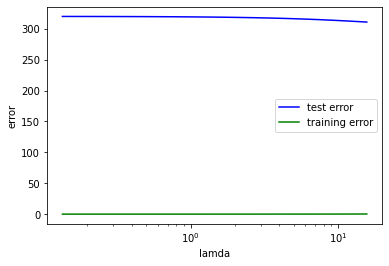

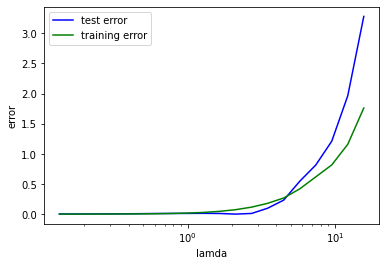

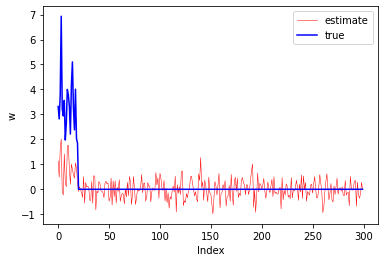

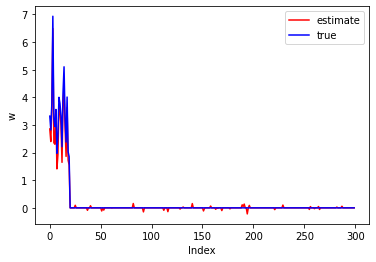

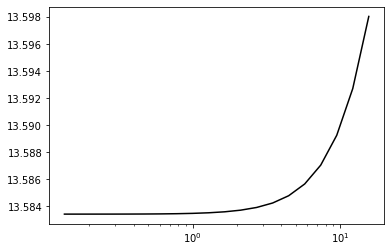

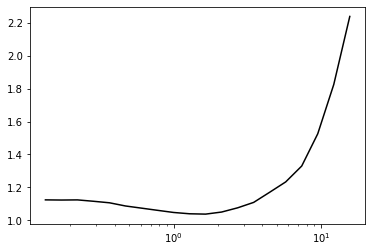

In [20]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Linear_regression:
    def __init__(self):
        # 目的変数の数
        self.n = 100
        # 説明変数の数
        self.d = 300
        # 値のある説明変数の数
        self.number = 20
        # X : n * d
        self.xtrain = np.random.randn(self.n, self.d)
        # 説明変数の数は最初のnumber個だけが値を持ち, 残りd - number個は0 : サイズd * 1
        self.w = np.vstack([np.random.randn(self.number, 1) + 3, np.zeros((self.d - self.number, 1))])
        # ノイズ
        sigma = 0.5
        # 目的変数:n * 1
        self.ytrain = np.dot(self.xtrain, self.w) + np.random.randn(self.n, 1) * sigma
        # test data
        self.xtest  = np.random.randn(self.n, self.d)
        self.ytest  = np.dot(self.xtest, self.w) + np.random.randn(self.n, 1) * sigma 
        # 正則化項の係数
        self.lamda     = np.exp(np.arange(-2,3,0.25))
        self.len_lamda = len(self.lamda)  
        # 値格納用配列
        self.test_error_ridge     = np.zeros((self.len_lamda, 1))
        self.param_error_ridge    = np.zeros((self.len_lamda, 1))
        self.training_error_ridge = np.zeros((self.len_lamda, 1))
        self.test_error_lasso     = np.zeros((self.len_lamda, 1))
        self.param_error_lasso    = np.zeros((self.len_lamda, 1))
        self.training_error_lasso = np.zeros((self.len_lamda, 1))

    def main(self):
        # main loop
        for i in range(self.len_lamda):
            a = np.dot(self.xtrain.T, self.xtrain) + self.lamda[i] * np.eye(self.d)
            b = np.dot(np.linalg.matrix_power(a, -1), self.xtrain.T)
            self.w_ridge = np.dot(b, self.ytrain)   
            # Ridge回帰　評価関数　最小二乗法
            self.test_error_ridge[i]     = np.sum(np.dot(self.xtest, self.w_ridge) - self.ytest)**2 / self.n
            self.param_error_ridge[i]    = np.linalg.norm(self.w - self.w_ridge, 2.0)
            self.training_error_ridge[i] = np.sum(np.dot(self.xtrain, self.w_ridge) - self.ytrain)**2 / self.n
            # cvx Lasso回帰
            self.w_lasso = cv.Variable((self.d, 1))
            # 評価関数
            J = 1 / 2 * cv.norm((self.ytrain - self.xtrain * self.w_lasso), 2) ** 2 + self.lamda[i] * cv.sum(cv.abs(self.w_lasso))
            # 評価関数の最小値
            objective = cv.Minimize(J)
            constraints = []
            prob   = cv.Problem(objective, constraints)
            result = prob.solve(solver = cv.CVXOPT) 

            # Lasso回帰　評価関数　最小二乗法
            self.test_error_lasso[i]     = np.sum(np.dot(self.xtest, self.w_lasso.value) - self.ytest)**2 / self.n
            self.param_error_lasso[i]    = np.linalg.norm(self.w - self.w_lasso.value, 2.0)
            self.training_error_lasso[i] = np.sum(np.dot(self.xtrain, self.w_lasso.value) - self.ytrain)**2 / self.n
    
    def DrowGraph(self):
        # Ridge回帰
        plt.figure(1)
        # test error
        plt.semilogx(self.lamda, self.test_error_ridge, 'b-', label = "test error")
        # trainig error
        plt.semilogx(self.lamda, self.training_error_ridge, 'g-', label = "training error")
        plt.xlabel("lamda")
        plt.ylabel("error")
        plt.legend()
        # Lasso回帰
        plt.figure(2)
        # test error
        plt.semilogx(self.lamda, self.test_error_lasso, 'b-', label = "test error")
        # trainig error
        plt.semilogx(self.lamda, self.training_error_lasso, 'g-', label = "training error")
        plt.xlabel("lamda")
        plt.ylabel("error")
        plt.legend()
        # Ridge param estimate
        plt.figure(3)
        plt.plot(self.w_ridge, 'r-', linewidth = 0.5, label = "estimate")
        plt.plot(self.w, 'b-', label = "true");
        plt.xlabel("Index")
        plt.ylabel("w")
        plt.legend()
        # Lasso param estimate
        plt.figure(4)
        plt.plot(self.w_lasso.value, 'r-', linewidth = 1.5, label = "estimate")
        plt.plot(self.w, 'b-', label = "true");
        plt.xlabel("Index")
        plt.ylabel("w")
        plt.legend()
        # param error ridge
        plt.figure(5)
        plt.semilogx(self.lamda, self.param_error_ridge, 'k-')
        # param_error_lasso
        plt.figure(6)
        plt.semilogx(self.lamda, self.param_error_lasso, 'k-')

lr = Linear_regression()
lr.main()
lr.DrowGraph()